
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of ETFs.  Construct portfolios from the ETFs and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,-36.21,3.73,24.07,9.00,14.17,16.15,11.82,16.84,24.07,1.43
1,DIA,DJIA ETF,US Stocks:Large Cap,-49.37,-3.81,14.01,6.91,10.10,13.07,10.21,16.52,14.01,0.85
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,-28.45,12.61,25.74,10.43,19.40,21.57,14.31,21.25,25.74,1.21
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,-39.42,5.34,23.37,8.21,13.57,16.32,12.05,17.14,23.37,1.36
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,-65.65,-1.07,12.52,1.29,7.01,20.64,16.67,22.74,12.52,0.55
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,-54.52,-1.19,14.95,4.87,10.02,16.82,14.03,20.26,14.95,0.74
6,IWD,Russell 1000 Value ETF,US Stocks:Value,-47.52,-10.83,13.51,5.03,8.44,13.16,10.01,16.59,13.51,0.81
7,IWF,Russell 1000 Growth ETF,US Stocks:Growth,-28.99,21.87,32.64,11.30,18.32,20.86,14.09,19.61,32.64,1.66
8,RSP,S&P 500 Equal Weight ETF,US Stocks:Growth,-50.75,-10.64,12.39,4.10,10.37,14.10,11.02,18.06,12.39,0.69
9,SPSM,S&P 600 Small Cap ETF,US Stocks:Small Cap,-64.44,-2.36,10.11,1.55,8.09,18.26,15.33,22.47,10.11,0.45


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank_filtered = rank
rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
7,IWF,Russell 1000 Growth ETF,US Stocks:Growth,-28.99,21.87,32.64,11.30,18.32,20.86,14.09,19.61,32.64,1.66
15,XLC,S&P500 Communication Services Sector ETF,US Stocks:Communication Services,-28.48,27.04,32.68,9.06,12.89,16.37,11.42,20.42,32.68,1.60
0,SPY,S&P 500 ETF,US Stocks:Large Cap,-36.21,3.73,24.07,9.00,14.17,16.15,11.82,16.84,24.07,1.43
43,SHY,1-3 Year Treasury Bond ETF,US Bonds,-1.31,1.26,3.80,1.33,1.20,1.26,0.87,2.39,3.80,1.59
36,JNK,High Yield Bond ETF,US Bonds:High Yield,-12.88,1.40,7.78,2.36,2.95,5.57,3.99,9.56,7.78,0.81
69,UUP,US Dollar ETF,Currencies:US Dollar,55.47,35.65,13.31,8.99,5.03,6.67,2.86,7.43,13.31,1.79
78,BITW,Bitwise 10 Crypto Index Fund,Currencies:Cryptocurrency,-67.44,1332.36,160.35,15.86,15.86,61.53,39.70,93.68,160.35,1.71
76,GBTC,Grayscale Bitcoin Trust ETF,Currencies:Cryptocurrency,-17.97,473.34,92.51,32.21,49.36,55.36,31.29,71.96,92.51,1.29
65,DBA,Agriculture ETF,Commodities:Agriculture,7.78,34.40,33.32,13.68,12.04,13.28,8.22,11.62,33.32,2.87
55,GLD,Gold ETF,Commodities:Gold,14.86,12.42,32.08,13.66,10.90,13.83,8.81,13.22,32.08,2.43


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'SPY': 0.50,
    'AGG': 0.50
}

# put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'SPY': 0.50,
    'BIL': 0.50
}

# top dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'XLK': 1/7,
    'IYR': 1/7,
    'VPL': 1/7,
    'FXY': 1/7,
    'PALL': 1/7,
    'BIL': 1/7,
    'SHY': 1/7
}

# 50% S&P 500, 50% long term treasury
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'SPY': 1/2,
    'TLT': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'SPY': 1/3,
    'AGG': 1/3,
    'JPST': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'VTI': 1/4,
    'SPY': 1/4,
    'QQQ': 1/4,
    'VXUS': 1/4   
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'SPY': 0.90,
    'BIL': 0.10
}

# https://www.forbes.com/sites/baldwin/2016/07/25/eight-famous-portfolios/#42c50d7d5cce
# american households: 25% real estate, 30% stocks, 30% fixed income, 5% cash, 10% alternatives
american_households_portfolio = {
    'Title': 'American Households Portfolio',
    'IYR': 0,
    'SPY': 0,
    'JPST': 0.43,
    'BIL': 0.51,
    'GLD': 0.06
}

# janet yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'JPST': 0.50,
    'SPY': 0.40,
    'BIL': 0.10
}

# risk off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'BIL': 1/3,
    'AGG': 1/3,
    'JPST': 1/3
}

# risk on: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'SPY': 1/3,
    'EEM':1/3,
}

# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()
portfolio_option

{'Title': 'Ranked Portfolio',
 'IWF': 0.07142857142857142,
 'XLC': 0.07142857142857142,
 'SPY': 0.07142857142857142,
 'SHY': 0.07142857142857142,
 'JNK': 0.07142857142857142,
 'UUP': 0.07142857142857142,
 'BITW': 0.07142857142857142,
 'GBTC': 0.07142857142857142,
 'DBA': 0.07142857142857142,
 'GLD': 0.07142857142857142,
 'DBP': 0.07142857142857142,
 'BIL': 0.07142857142857142,
 'SHV': 0.07142857142857142,
 'JPST': 0.07142857142857142}

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Annual Returns'},
    'Asset Subclass':    {'weight_by': 'Equal'},
    'Investment Option': {'weight_by': 'Std Dev'},
}

# weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,IWF,XLC,SPY,SHY,JNK,UUP,BITW,GBTC,DBA,GLD,DBP,BIL,SHV,JPST,Ranked Portfolio
Annual Returns,32.64,32.68,24.07,3.80,7.78,13.31,160.35,92.51,33.32,32.08,33.15,5.20,5.15,5.59,36.29
Std Dev,19.61,20.42,16.84,2.39,9.56,7.43,93.68,71.96,11.62,13.22,14.74,0.54,0.62,0.84,12.84
Sharpe Ratio,1.66,1.60,1.43,1.59,0.81,1.79,1.71,1.29,2.87,2.43,2.25,9.63,8.31,6.65,2.83
Weight,0.18,0.18,0.18,0.02,0.02,0.13,0.06,0.07,0.01,0.01,0.01,0.03,0.02,0.05,1.00
Worst Typical Down Year,-6.58,-8.16,-9.61,-0.98,-11.34,-1.55,-27.01,-51.41,10.08,5.64,3.67,4.12,3.91,3.91,10.61
Black Swan,-26.19,-28.58,-26.45,-3.37,-20.90,-8.98,-120.69,-123.37,-1.54,-7.58,-11.07,3.58,3.29,3.07,-2.22


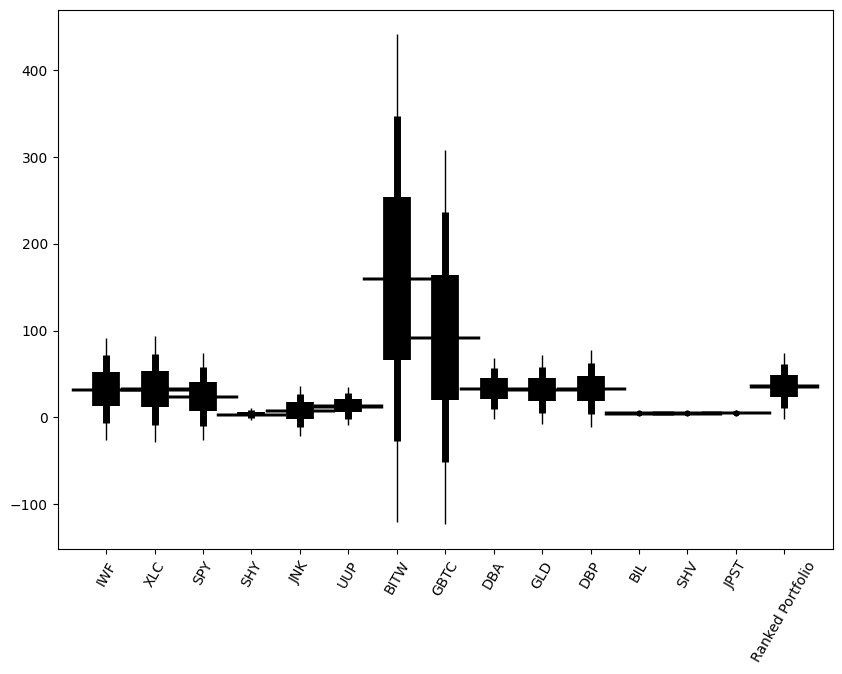

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

,SPY,IWF,XLC,JNK,SHY,JPST,BIL,SHV,GLD,DBA,DBP,UUP,GBTC,BITW
SPY,1.00,0.95,0.77,0.16,0.16,0.03,0.03,0.03,0.25,0.13,0.13,-0.17,-0.18,-0.18
IWF,0.95,1.00,0.77,0.16,0.16,0.03,0.03,0.03,0.13,0.13,0.13,-0.18,-0.18,-0.18
XLC,0.77,0.77,1.00,0.16,0.16,0.03,0.03,0.03,0.13,0.13,0.13,-0.18,-0.18,-0.18
JNK,0.16,0.16,0.16,1.00,0.64,0.12,0.12,0.12,-0.09,-0.09,-0.09,-0.60,-0.60,-0.60
SHY,0.16,0.16,0.16,0.64,1.00,0.12,0.12,0.12,-0.09,-0.09,-0.09,-0.60,-0.60,-0.60
JPST,0.03,0.03,0.03,0.12,0.12,1.00,0.39,0.39,-0.06,-0.06,-0.06,-0.08,-0.08,-0.08
BIL,0.03,0.03,0.03,0.12,0.12,0.39,1.00,1.00,-0.06,-0.06,-0.06,-0.08,-0.08,-0.08
SHV,0.03,0.03,0.03,0.12,0.12,0.39,1.00,1.00,-0.06,-0.06,-0.06,-0.08,-0.08,-0.08
GLD,0.25,0.13,0.13,-0.09,-0.09,-0.06,-0.06,-0.06,1.00,0.09,0.97,-0.38,-0.17,-0.17
DBA,0.13,0.13,0.13,-0.09,-0.09,-0.06,-0.06,-0.06,0.09,1.00,0.10,-0.17,-0.17,-0.17


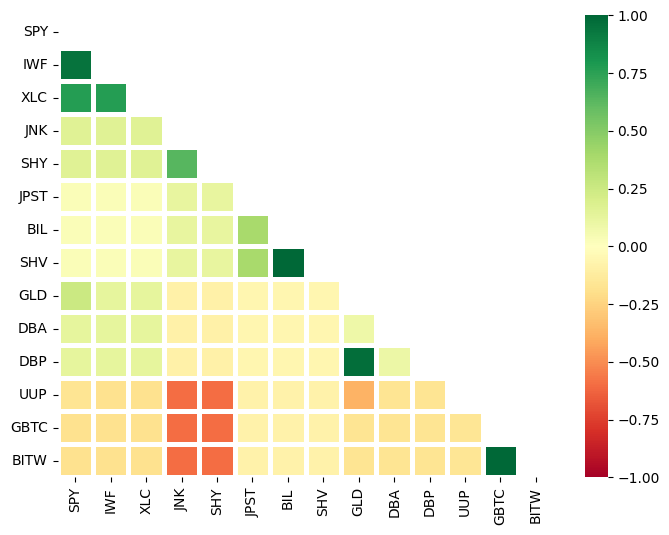

In [14]:
correlation_matrix = bb.show_correlation_heatmap(df, portfolio_option)
correlation_matrix

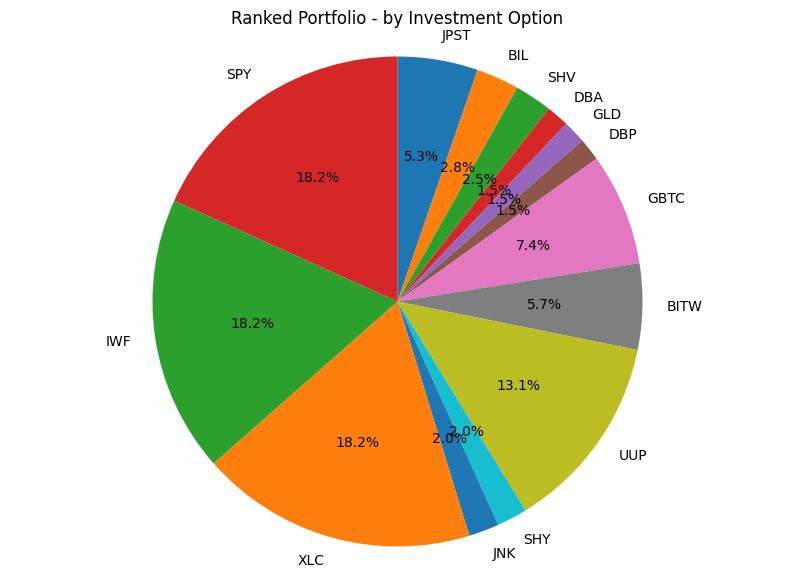

JPST   0.05
BIL    0.03
SHV    0.02
DBA    0.01
GLD    0.01
DBP    0.01
GBTC   0.07
BITW   0.06
UUP    0.13
SHY    0.02
JNK    0.02
XLC    0.18
IWF    0.18
SPY    0.18



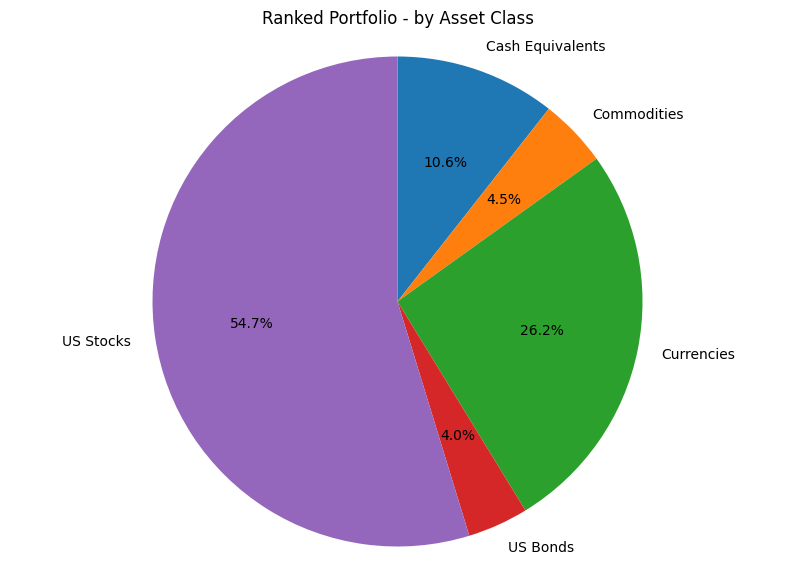

Cash Equivalents   0.11
Commodities        0.04
Currencies         0.26
US Bonds           0.04
US Stocks          0.55



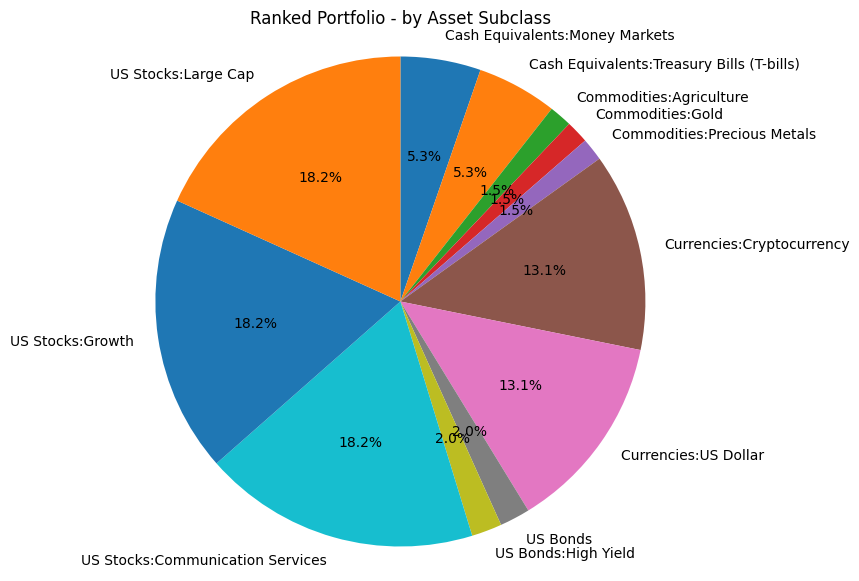

Cash Equivalents:Money Markets              0.05
Cash Equivalents:Treasury Bills (T-bills)   0.05
Commodities:Agriculture                     0.01
Commodities:Gold                            0.01
Commodities:Precious Metals                 0.01
Currencies:Cryptocurrency                   0.13
Currencies:US Dollar                        0.13
US Bonds                                    0.02
US Bonds:High Yield                         0.02
US Stocks:Communication Services            0.18
US Stocks:Growth                            0.18
US Stocks:Large Cap                         0.18



In [15]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class', 'Asset Subclass'])

In [16]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    IWF                            0.1825
    XLC                            0.1825
    SPY                            0.1825
    SHY                            0.0200
    JNK                            0.0200
    UUP                            0.1308
    BITW                           0.0568
    GBTC                           0.0740
    DBA                            0.0150
    GLD                            0.0150
    DBP                            0.0150
    BIL                            0.0283
    SHV                            0.0247
    JPST                           0.0530


### Optimize Portfolio

In [17]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [18]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 2,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer..................

Ranked Portfolio Metrics:          
    max_sharpe_ratio           5.41
    annual_return             14.74
    std_dev                    2.72
    worst typical down year    9.29
    black_swan                 6.57


Ranked Portfolio Weights:
    IWF                            0.0000
    XLC                            0.0700
    SPY                            0.0000
    SHY                            0.1200
    JNK                            0.2000
    UUP                            0.2000
    BITW                           0.0000
    GBTC                           0.0000
    DBA                            0.1400
    GLD                            0.0000
    DBP                            0.0600
    BIL                            0.1200
    SHV                            0.0000
    JPST                           0.0900



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).